In [1]:
%run ../code/utils.ipynb

[2024-01-23 14:33:59,850 INFO] [numexpr.utils.utils._init_num_threads] Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data_dir1 = f"{project_dir}data\\matchup_summary\\"
data_dir2 = f"{project_dir}data\\matchup_player_data\\"

In [8]:
df1 = pd.read_csv(data_dir1 + 'to_date_matchup_summaries_tidy.csv', index_col='season_week')
df2 = pd.read_csv(data_dir2 + 'matchup_player_data_through_2023.csv')

In [11]:
df1 = df1[df1['season'] == 2023]
df1.shape

(224, 13)

In [22]:
df2['season_week'] = df2['manager'] + '|' + df2['season'].astype(str) +'|' + df2['week'].astype(str)

In [24]:
df2.set_index('season_week', inplace=True)

In [26]:
df = df1.join(df2, rsuffix='df2')

In [28]:
df.shape

(224, 71)

In [103]:
bench_pos = ['manager', 'points_for', 'win', 'BN1', 'BN1_points', 'BN2', 'BN2_points', 'BN3','BN3_points', 'BN4','BN4_points', 'BN5','BN5_points', 'BN6','BN6_points', 'team_name']

In [104]:
ben = df[bench_pos]

In [110]:
max_bench = []
for index, row in ben.iterrows():
    bench = { row[f"BN{i}"]:  row[f"BN{i}_points"] for i in range(1,7) }
    new_row = {
        'season_week' : index,
        'team_name': row['team_name'],
        'BN_player' : max(bench, key=bench.get),
        'BN_highest_points' : max(bench.values()),
        'points_for' : row['points_for'],
        'win': row['win']
    }
    max_bench.append(new_row)

In [111]:
max_bench_df = pd.DataFrame(max_bench)

In [112]:
highest_bench = max_bench_df['BN_highest_points'].sort_values(ascending=False)[:10]

In [113]:
extremes = max_bench_df[max_bench_df['BN_highest_points'].isin(highest_bench) ]

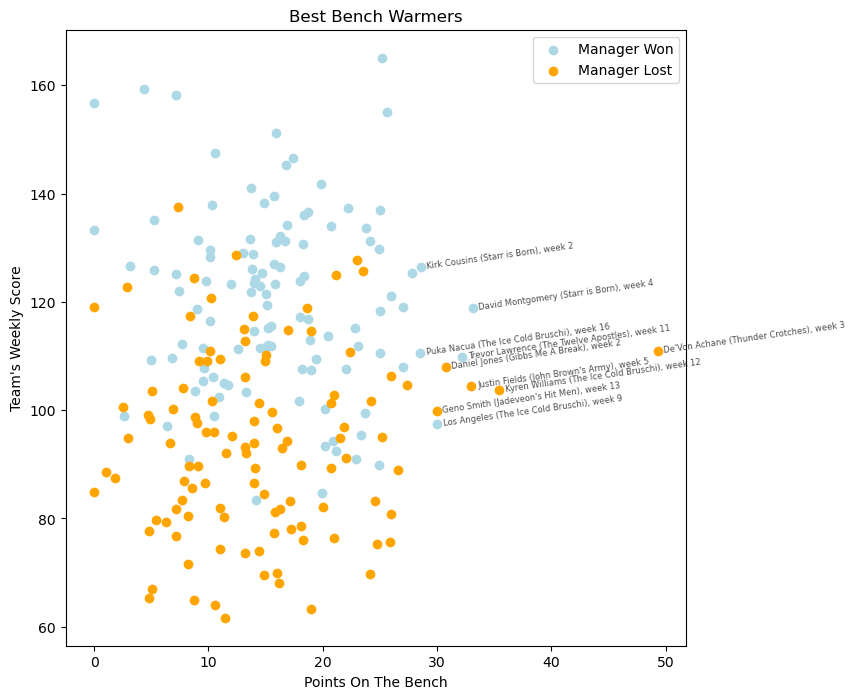

In [114]:
plt.figure(figsize=(8,8))
plt.title("Best Bench Warmers")
plt.xlabel('Points On The Bench')
plt.ylabel("Team's Weekly Score")
plt.scatter(y=max_bench_df[max_bench_df['win'] ==1]['points_for'], x = max_bench_df[max_bench_df['win'] ==1]['BN_highest_points'], color='lightblue', label='Manager Won')

plt.scatter(y=max_bench_df[max_bench_df['win'] ==0]['points_for'], x = max_bench_df[max_bench_df['win'] ==0]['BN_highest_points'], color='orange', label='Manager Lost')

for _,row in extremes.iterrows():
    # if row['BN_points'] < 40:
    #     rotation = -10
    # else:
    #     rotation = -2
    id = row['season_week'].split('|')
    text = f"{row['BN_player']} ({row['team_name']}), week {id[2]}"
    plt.annotate(text, (row['BN_highest_points'], row['points_for']), xycoords='data', ha='left', rotation=8, alpha = 0.7, size= 6, xytext=(4,-1), textcoords='offset points')   
plt.legend()